## Data Preparation

In [ ]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
!unzip Files.zip

Archive:  Files.zip
  inflating: hwr/README.roboflow.txt  
  inflating: hwr/valid/New-Doc-04-02-2024-22-43_16_jpg.rf.73eff58b245b16833f05c2ec1f379ae7.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-43_17_jpg.rf.12b2fb7d1a02894cf4617f1a2f733f72.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-49_10_jpg.rf.b97f2c8071990aaf96b05cce1aae7dcd.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-49_16_jpg.rf.090770d04e3a56a3cf1531b754bd0a2f.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-49_1_jpg.rf.c5cf8284147212f662be15149b8d55cf.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-49_9_jpg.rf.99e937849f3403133b7076bdbe438a65.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-59_21_jpg.rf.87ffba3d14eeebeb7389535e872be6fb.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-59_25_jpg.rf.e1ba43c918d2f8f12f49a63e0c99a504.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-22-59_3_jpg.rf.1159165519788c158871054bbc8f0adf.jpg  
  inflating: hwr/valid/New-Doc-04-02-2024-23-20_13_jpg.rf.ef8a3cd6f695c

In [ ]:
import json
import os
from PIL import Image

def load_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)
    return annotations

def associate_annotations_with_images(annotations, image_folder):
    annotations_by_image = {}
    for annotation in annotations['annotations']:
        image_id = annotation['image_id']
        image_file_name = annotations['images'][image_id]['file_name']
        image_path = os.path.join(image_folder, image_file_name)
        if image_path not in annotations_by_image:
            annotations_by_image[image_path] = []
        annotations_by_image[image_path].append(annotation)
    return annotations_by_image

def crop_and_label_images(annotations_by_image, categories, base_dir):
    new_dir = os.path.join(base_dir, 'new')
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)  # Ensure the base directory 'new' exists

    data = []
    for image_path, image_annotations in annotations_by_image.items():
        image = Image.open(image_path)  # Load image
        for annotation in image_annotations:
            bbox = annotation['bbox']  # bbox is [x, y, width, height]
            cropped_image = image.crop((bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]))
            if cropped_image.width == 0 or cropped_image.height == 0:
                continue  # Skip if the cropped image has invalid dimensions
            category_id = annotation['category_id']
            category_folder = os.path.join(new_dir, str(category_id))
            if not os.path.exists(category_folder):
                os.makedirs(category_folder)  # Create category folder if it does not exist
            file_name = os.path.basename(image_path)
            save_path = os.path.join(category_folder, file_name)
            cropped_image.save(save_path)  # Save the cropped image
            label = categories[category_id]['name']
            data.append({'image_path': save_path, 'label': label})
    return data


In [ ]:

annotations_file_train = 'hwr/train/_annotations.coco.json'
annotations_file_test = 'hwr/test/_annotations.coco.json'
annotations_file_valid = 'hwr/valid/_annotations.coco.json'

annotations_train = load_annotations(annotations_file_train)
annotations_test = load_annotations(annotations_file_test)
annotations_valid = load_annotations(annotations_file_valid)

categories_train = {category['id']: category for category in annotations_train['categories']}
categories_test = {category['id']: category for category in annotations_test['categories']}
categories_valid = {category['id']: category for category in annotations_valid['categories']}


folder_tr = 'hwr/train'
folder_te = 'hwr/test'
folder_vl = 'hwr/valid'

annotations_by_image_tr = associate_annotations_with_images(annotations_train, folder_tr)
annotations_by_image_te = associate_annotations_with_images(annotations_test, folder_te)
annotations_by_image_vl = associate_annotations_with_images(annotations_valid, folder_vl)

train_data = crop_and_label_images(annotations_by_image_tr, categories_train , folder_tr)
test_data = crop_and_label_images(annotations_by_image_te, categories_test , folder_te)
val_data = crop_and_label_images(annotations_by_image_vl, categories_valid, folder_vl)

In [ ]:
train_data[0:2]

[{'image_path': 'hwr/train/new/33/New-Doc-04-03-2024-10-27_11_jpg.rf.008bedbdee2b16fa21fc0a3449ea7506.jpg',
  'label': '0xd05 0xd31 0xd41'},
 {'image_path': 'hwr/train/new/625/New-Doc-04-03-2024-10-27_11_jpg.rf.008bedbdee2b16fa21fc0a3449ea7506.jpg',
  'label': '0xd35 0xd2f 0xd38 0xd4d 0xd38 0xd41 0xd33 0xd4d 0xd33'}]

In [ ]:
#train data example
ex_tr = train_data[2]['image_path']
lbl = train_data[2]['label']
from IPython.display import display
img = Image.open(ex_tr)
display(img)
print(lbl)

0xd35 0xd2f 0xd38 0xd4d 0xd38 0xd41 0xd33 0xd4d 0xd33


In [ ]:
#test data example
ex_te = test_data[2]['image_path']
lbl = test_data[2]['label']
img = Image.open(ex_te)
display(img)
print(lbl)

0xd2e 0xd32 0xd3e


In [ ]:
#val data ex
ex_vl = val_data[2]['image_path']
lbl = val_data[2]['label']
img = Image.open(ex_vl)
display(img)
print(lbl)

0xd2e 0xd3e 0xd32


In [ ]:
print("length of train data:", len(train_data) )
print("length of test data:", len(test_data) )
print("length of val data:", len(val_data) )


length of train data: 1962
length of test data: 227
length of val data: 436


In [ ]:


# characters = set()
# max_len = 0

# for entry in train_data:
#     label = entry['label']
#     chars = label.split()
#     for char in chars:
#         characters.add(char)
#     max_len = max(max_len, len(chars))

# print("Maximum length of any label (in characters):", max_len)
# print("Unique characters count:", len(characters))
# print("Characters:", sorted(characters))



In [ ]:
train_images = [entry['image_path'] for entry in train_data]
train_labels = [entry['label'] for entry in train_data]
test_images = [entry['image_path'] for entry in test_data]
test_labels = [entry['label'] for entry in test_data]
val_images = [entry['image_path'] for entry in val_data]
val_labels = [entry['label'] for entry in val_data]

In [ ]:

# Initialize an empty set to hold unique characters
characters = set()

# Function to convert hex codes to characters
def hex_to_char(hex_code):
    return chr(int(hex_code, 16))

# Iterate through each item in the training data
for data_item in train_data:
    # Split the label to get each hex code
    hex_codes = data_item['label'].split()
    # Convert each hex code to a character and add to the set
    for code in hex_codes:
        characters.add(hex_to_char(code))

# Convert the set to a sorted list
characters_array = sorted(list(characters))

# Print or use the array of characters
print(characters_array)


[' ', '\\', 'ം', 'അ', 'ആ', 'ഇ', 'ഈ', 'ഉ', 'ഊ', 'എ', 'ഏ', 'ഒ', 'ഓ', 'ക', 'ഖ', 'ഗ', 'ഘ', 'ങ', 'ച', 'ഛ', 'ജ', 'ഞ', 'ട', 'ഠ', 'ഡ', 'ണ', 'ത', 'ഥ', 'ദ', 'ധ', 'ന', 'പ', 'ബ', 'ഭ', 'മ', 'യ', 'ര', 'റ', 'ല', 'ള', 'ഴ', 'വ', 'ശ', 'ഷ', 'സ', 'ഹ', 'ാ', 'ി', 'ീ', 'ു', 'ൂ', 'ൃ', 'െ', 'േ', 'ൈ', 'ൊ', 'ോ', '്', '൦', '൪', '൯', 'ൺ', 'ൻ', 'ർ', 'ൽ', 'ൾ', '\u200c', '\u200d']


In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
vocabulary = char_to_num.get_vocabulary()
mapping = {i: char for i, char in enumerate(vocabulary)}

for key, value in mapping.items():
    print(f"{key}: '{value}'")

0: '[UNK]'
1: 'ച'
2: 'ന'
3: 'ക'
4: 'േ'
5: 'ര'
6: 'ി'
7: '൯'
8: 'ഈ'
9: 'ല'
10: 'എ'
11: 'ഭ'
12: 'ഒ'
13: 'ം'
14: 'പ'
15: 'ദ'
16: '൦'
17: 'ഉ'
18: 'ഥ'
19: 'ജ'
20: 'വ'
21: 'ഘ'
22: 'ൺ'
23: 'ു'
24: 'ങ'
25: '്'
26: 'ഴ'
27: 'ഖ'
28: 'യ'
29: 'ാ'
30: 'ീ'
31: 'ൊ'
32: 'ഹ'
33: 'സ'
34: 'ൂ'
35: 'ഞ'
36: 'ൃ'
37: 'ഷ'
38: 'ഓ'
39: 'മ'
40: ' '
41: 'ട'
42: 'ൾ'
43: 'ഇ'
44: 'ബ'
45: 'ഗ'
46: 'ള'
47: '\'
48: '‌'
49: 'ത'
50: '‍'
51: 'ൽ'
52: 'ഠ'
53: '൪'
54: 'അ'
55: 'റ'
56: 'ഛ'
57: 'ണ'
58: 'ർ'
59: 'ോ'
60: 'ഊ'
61: 'ഏ'
62: 'ധ'
63: 'ആ'
64: 'ൈ'
65: 'ശ'
66: 'ഡ'
67: 'െ'
68: 'ൻ'


In [ ]:

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [ ]:
# import tensorflow as tf

# def distortion_free_resize(image, img_size):
#     target_width, target_height = img_size
#     image = tf.image.resize(image, size=(target_height, target_width), preserve_aspect_ratio=True)

#     # Check the amount of padding needed.
#     pad_height = max(target_height - tf.shape(image)[0], 0)  # Ensure non-negative
#     pad_width = max(target_width - tf.shape(image)[1], 0)    # Ensure non-negative

#     # Adjust padding for equal distribution on both sides.
#     pad_height_top = pad_height // 2
#     pad_height_bottom = pad_height - pad_height_top
# #
#     pad_width_left = pad_width // 2
#     pad_width_right = pad_width - pad_width_left

#     # Pad the image.
#     paddings = [
#         [pad_height_top, pad_height_bottom],
#         [pad_width_left, pad_width_right],
#         [0, 0]  # Assuming image has 3 dimensions, adjust if different
#     ]
#     image = tf.pad(image, paddings=paddings, mode='CONSTANT', constant_values=0)

#     # The following transformations seem to be your specific use-case.
#     image = tf.transpose(image, perm=[1, 0, 2])
#     image = tf.image.flip_left_right(image)

#     return image


In [ ]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

# def find_max_length(labels):
#     return max(len(label) for label in labels)
# max_len=find_max_length(train_labels)

max_len = 32
def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [ ]:
def convert_code_points_to_unicode(label):
    return ''.join(chr(int(cp, 16)) for cp in label.split())


train_labels_converted = [convert_code_points_to_unicode(label) for label in train_labels]
test_labels_converted = [convert_code_points_to_unicode(label) for label in test_labels]
val_labels_converted = [convert_code_points_to_unicode(label) for label in val_labels]

print(train_labels_converted)


['അറു', 'വയസ്സുള്ള', 'വയസ്സുള്ള', 'വയസ്സുള്ള', 'വയസ്സുള്ള', 'വയസ്സുള്ള', 'തത്ത', 'മല', 'മരംകൾ', 'തവള', 'വടിെകൾ', 'ആകൾ', 'പന', 'ആന', 'മാല', 'വീണ', 'പറവ', 'ഓണം', 'കസേര', 'ഈച്ച', 'കുതിര', 'ചെടി', 'പന', 'ആന', 'മലാ', 'വിണ', 'പറവ', 'ഓണം', 'കസ്\u200cര', 'ഇിച്ച', 'കുധിര', 'ചോടി', 'അറു', 'വയസ്സുള്ള', 'സാവിത്രിക്കുട്ടി', 'അച്ഛൻെ', 'കൈ', 'പിടിച്ചുവലിച്ചു', 'ഉമ്മറത്തേക്ക്', 'കൊണ്ടുവന്നു', 'പറയു', 'പറയു', 'അച്ഛാ', 'അച്ഛൻ', 'ഉമ്മറത്തെ', 'ചാരുകസേരയിലിരുന്നു', 'പറപ', 'എസം', 'അമാൾ', 'കാക്ക', 'കടുവ്', 'തറ', 'മലി', 'പന', 'ആന', 'മലി', 'വിണ', 'പറവ', 'ഓണം', 'കസേര', 'ഈച്ച', 'കുതിര', 'ചൊടി', 'ചെമ്പരത്തി', 'താമര', 'തവള', 'പൂവ്\u200c', 'ഇല', 'വീട്', 'കുഞ്ഞ്', 'കുരുന്ന്', 'മണ്ണ്', 'തേൻ', 'അമ്മ', 'ആന', 'കടുവ', 'സിംഹം', 'സൂര്യൻ', 'പന', 'ആന', 'മാല', 'പറവ', 'ഓണ', 'കശര', 'ഇച', 'ചാട്ട', 'താടി', 'പറവ', 'കുട്', 'വീട്', 'മണ്ണ്', 'മാങ്ങ്', 'മുാ', 'പന', 'ആന', 'മാല', 'പീണ', 'പറപ', 'ഈച്ച', 'ആന', 'ചെടി', 'മരഠ', 'മാ൯', 'പീണ', 'പഴം', 'മാങ്ങ', 'പൂറ്', 'ഞത്ത', 'അമ്മ', 'അമ്മ൯', 'പന', 'ആന', 'മാല', 'വീണ', 'പറവ', 'ഓണം', 'കസേര', 'ഈച്ച

In [ ]:
train_ds = prepare_dataset(train_images, train_labels_converted)
validation_ds = prepare_dataset(val_images, val_labels_converted)
test_ds = prepare_dataset(test_images, test_labels_converted)

## Visualize a few samples

In [ ]:
!unzip manjari.zip

Archive:  manjari.zip
  inflating: Manjari-Thin.ttf        
  inflating: Manjari-Regular.otf     
  inflating: Manjari-Bold.ttf        
  inflating: Manjari-Bold.otf        
  inflating: Manjari-Regular.woff2   
  inflating: Manjari-Thin.woff2      
  inflating: Manjari-Bold.woff2      
  inflating: Manjari-Thin.otf        
  inflating: Manjari-Regular.ttf     


In [ ]:
# matplotlib and malayalamfont manjari
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont


#https://smc.org.in/fonts/#manjari  - > malayalam font dwld akanam ivdunu - manjari font
path = '/content/Manjari-Bold.ttf'
prop = fm.FontProperties(fname=path)

for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label != padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label, fontproperties=prop)  # Use the Malayalam font
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
#plotly - labels ; matplotlib - images
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf

# First, display images using Matplotlib
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))
    label_texts = []

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label_text = label.numpy().decode("utf-8")
        label_texts.append(label_text)  # Save label for Plotly

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].axis("off")
    plt.show()

# Then, use Plotly to display the labels interactively
fig = go.Figure()
for idx, label in enumerate(label_texts):
    # Add traces for each label
    fig.add_trace(go.Scatter(
        x=[idx % 4],
        y=[idx // 4],
        text=[label],
        mode="text",
        textposition="middle center"
    ))

# Update the layout for a cleaner look
fig.update_layout(
    title="Labels from the Dataset",
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=300,  # Adjust size as needed
    width=600,
    showlegend=False
)
fig.show()


In [ ]:
# for data in train_ds.take(1):
#     images, labels = data["image"], data["label"]

#     _, ax = plt.subplots(4, 4, figsize=(15, 8))

#     for i in range(16):
#         img = images[i]
#         img = tf.image.flip_left_right(img)
#         img = tf.transpose(img, perm=[1, 0, 2])
#         img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
#         img = img[:, :, 0]

#         # Gather indices where label!= padding_token.
#         label = labels[i]
#         indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
#         # Convert to string.
#         label = tf.strings.reduce_join(num_to_char(indices))
#         label = label.numpy().decode("utf-8")

#         ax[i // 4, i % 4].imshow(img, cmap="gray")
#         ax[i // 4, i % 4].set_title(label)
#         ax[i // 4, i % 4].axis("off")


# plt.show()

In [ ]:

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

In [ ]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [ ]:

def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

## Training



In [ ]:
epochs = 10  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/10
2/2 [==============================] - 2s 61ms/step
Mean edit distance for epoch 1: 32.0000
31/31 [==============================] - 38s 887ms/step - loss: 34.7148 - val_loss: 21.6982
Epoch 2/10
2/2 [==============================] - 0s 63ms/step
Mean edit distance for epoch 2: 32.0000
31/31 [==============================] - 23s 757ms/step - loss: 19.8183 - val_loss: 20.4210
Epoch 3/10
2/2 [==============================] - 0s 54ms/step
Mean edit distance for epoch 3: 32.0000
31/31 [==============================] - 21s 686ms/step - loss: 19.0417 - val_loss: 19.9779
Epoch 4/10
2/2 [==============================] - 0s 87ms/step
Mean edit distance for epoch 4: 32.0000
31/31 [==============================] - 20s 666ms/step - loss: 18.7033 - val_loss: 19.6621
Epoch 5/10
2/2 [==============================] - 0s 53ms/step
Mean edit distance for epoch 5: 32.0000
31/31 [==============================] - 22s 729ms/step - loss: 18.4025 - val_loss: 19.4385
Epoch 6/10
2/2 [=========

## Testing

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import numpy as np
# import tensorflow as tf
# from PIL import Image, ImageDraw, ImageFont

# # A utility function to decode the output of the network.
# def decode_batch_predictions(pred):
#     input_len = np.ones(pred.shape[0]) * pred.shape[1]
#     # Use greedy search. For complex tasks, you can use beam search.
#     results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
#         :, :max_len
#     ]
#     # Iterate over the results and get back the text.
#     output_text = []
#     for res in results:
#         res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
#         res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
#         output_text.append(res)
#     return output_text


# # Ensure matplotlib uses a font that can render Malayalam characters.
# # You might need to download a specific font that supports Malayalam.
# path = '/content/Manjari-Bold.ttf'
# prop = fm.FontProperties(fname=path)

# for batch in test_ds.take(2):
#     batch_images = batch["image"]
#     _, ax = plt.subplots(4, 4, figsize=(15, 8))

#     preds = prediction_model.predict(batch_images)
#     pred_texts = decode_batch_predictions(preds)

#     for i in range(16):
#         img = batch_images[i]
#         img = tf.image.flip_left_right(img)
#         img = tf.transpose(img, perm=[1, 0, 2])
#         img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
#         img = img[:, :, 0]

#         title = f"Prediction: {pred_texts[i]}"
#         ax[i // 4, i % 4].imshow(img, cmap="gray")
#         ax[i // 4, i % 4].set_title(title ,fontproperties=prop)
#         ax[i // 4, i % 4].axis("off")

# plt.show()

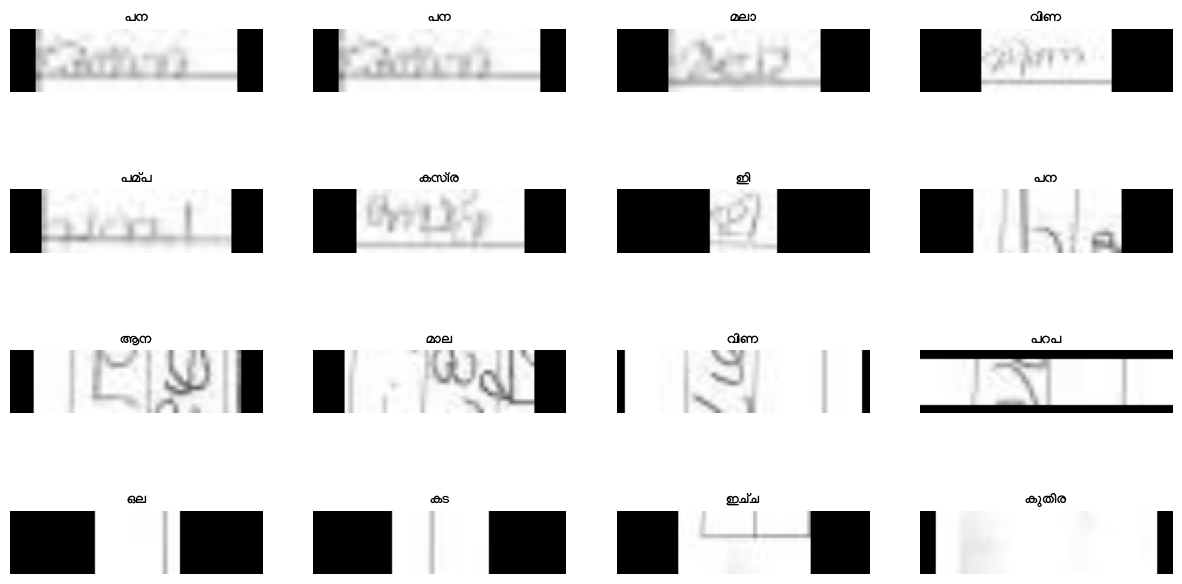

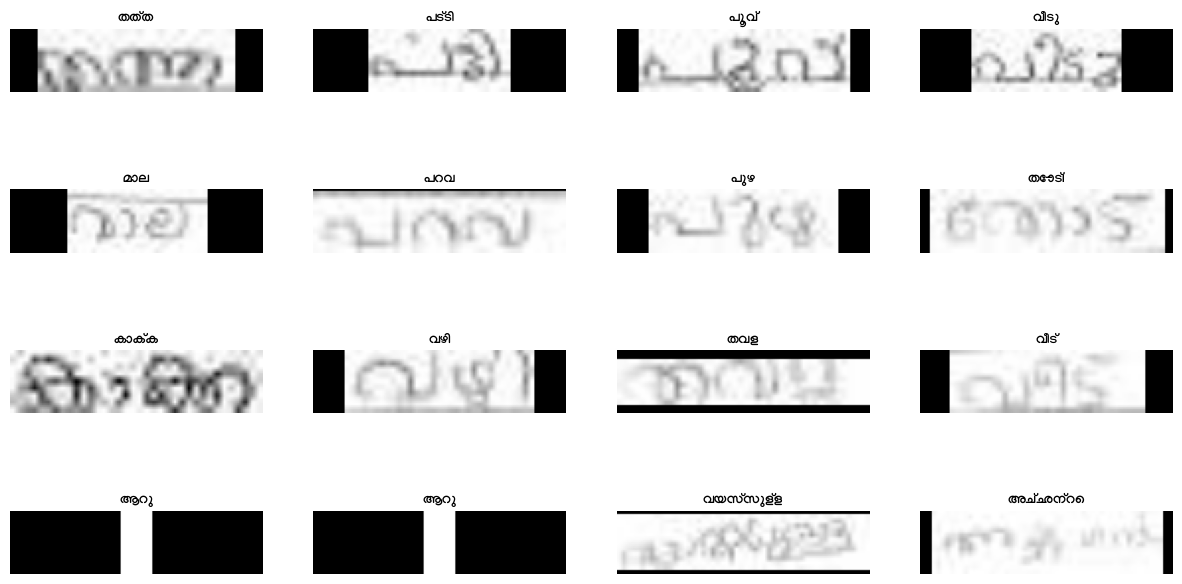

In [ ]:
# matplotlib and malayalamfont manjari
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont


#https://smc.org.in/fonts/#manjari  - > malayalam font dwld akanam ivdunu - manjari font
path = '/content/Manjari-Bold.ttf'
prop = fm.FontProperties(fname=path)

for data in test_ds.take(2):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label != padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label, fontproperties=prop)  # Use the Malayalam font
        ax[i // 4, i % 4].axis("off")

plt.show()